In [ ]:
Основы статистики.
Доверительные
интервалы

In [ ]:
Доверительные интервалы (ДИ) - это фундаментальное
понятие в статистике, представляющее собой диапазон,
в котором, как мы ожидаем, будет находиться параметр
генеральной совокупности (например, среднее значение
или доля) на основе данных выборки.

In [ ]:
95% -- 0.95 
справа и слева по 0.025
правая граница 0.975
Z-score правой границы 1.96
доверительный интервал 
0 +- 1.96 -- 95% доверительный интервал

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Есть студенты, часть сдала экзамен, часть нет
# есть выборка из 30 студентов, 20 сдало

# 1.96 -- по Z-таблице для 95% (см. выше)
print(20/30) # вероятность успеха на выборке
print(20/30 + 1.96*np.sqrt((20/30 * 10/30)/30)) # правая граница доверительного интервала для вероянтности генеральной совокупности (всех сутдентов)
print(20/30 - 1.96*np.sqrt((20/30 * 10/30)/30)) # левая ...

0.6666666666666666
0.8353566079681453
0.497976725365188


In [15]:
# Генерируем выборку
np.random.seed(0) # Для воспроизводимости
data = np.random.normal(loc=100, scale=15, size=50) # loc=mean, scale=std,size=размер выборки
data

array([126.46078519, 106.00235813, 114.68106976, 133.61339799,
       128.01336985,  85.3408318 , 114.25132626,  97.72964188,
        98.45171722, 106.15897753, 102.16065357, 121.8141026 ,
       111.41556588, 101.82512525, 106.65794849, 105.00511491,
       122.4111861 ,  96.92262604, 104.69601552,  87.18856391,
        61.70515276, 109.80427893, 112.96654298,  88.86752469,
       134.04631936,  78.18451488, 100.68637776,  97.19224225,
       122.99168822, 122.04038155, 102.32421139, 105.67243779,
        86.68321379,  70.28805298,  94.78131776, 102.34523454,
       118.45436021, 118.03569773,  94.19009774,  95.46545874,
        84.27170552,  78.69973094,  74.40594714, 129.26163093,
        92.35521727,  93.42888548,  81.2080696 , 111.66235534,
        75.79153229,  96.8088958 ])

In [14]:
# Рассчитайте среднее значение и стандартную ошибку среднего
mean = np.mean(data)
sem = st.sem(data) # Стандартная ошибка среднего
# Определите доверительный интервал
confidence = 0.95
# Вычислить доверительный интервал
ci = st.t.interval(confidence=confidence, df=len(data)-1, loc=mean, scale=sem) # t - интервал для маленьких выдорок до 30, когда выборка больше, то используем norm
print(mean, sem)
print(f"95% доверительный интервал (с использованием t-распределения): {ci}")

102.10838908469648 2.411834829760384
95% доверительный интервал (с использованием t-распределения): (np.float64(97.26162553476419), np.float64(106.95515263462877))


In [19]:
# Для больших наборов данных мы можем использовать нормальное распределение
ci_large = st.norm.interval(confidence=confidence, loc=mean, scale=sem)
print(f"95% доверительный интервал (с использованием нормального распределения): {ci_large}")

95% доверительный интервал (с использованием нормального распределения): (np.float64(97.38127968170684), np.float64(106.83549848768612))


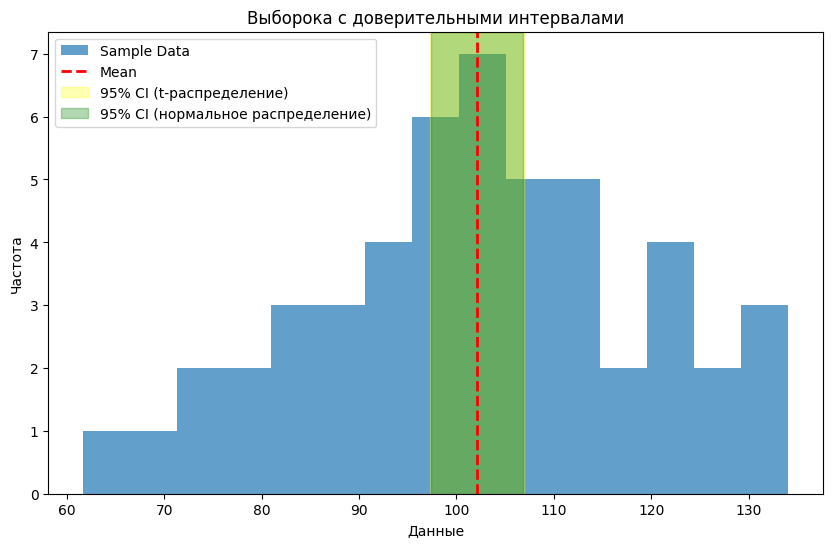

In [22]:
# Построение графика данных выборки
plt.figure(figsize=(10, 6))
plt.hist(data, bins=15, alpha=0.7, label='Sample Data')
# Построение графика среднего значения
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
# Выделение доверительного интервала
plt.axvspan(ci[0], ci[1], color='yellow', alpha=0.3, label='95% CI (t-распределение)')
plt.axvspan(ci_large[0], ci_large[1], color='green', alpha=0.3, label='95% CI (нормальное распределение)')
plt.xlabel('Данные')
plt.ylabel('Частота')
plt.title('Выборока с доверительными интервалами')
plt.legend()
plt.show()